In [2]:
# There are two useful forms of the quadratic equation. 
# Both should yield equivalent roots. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

def roots(a,b,c):
    r1= (-b + (b**2 -4*a*c)**(0.5))/(2*a)
    r2= (-b - (b**2 -4*a*c)**(0.5))/(2*a)
    r3= (-2*c)/(b+(b**2-4*a*c)**(0.5))
    r4= (-2*c)/(b-(b**2-4*a*c)**(0.5))
     
    return [r1,r2,r3,r4]

# I will define this function, which will return the 4 roots of a quadratic order equation. 

In [4]:
# A simple function whose roots can are known is a = 1, b = 5, c = 6.
# The roots are known to be both x = -2, x = -3.

a=[]

a = roots(1,5,6)

print(a)


[-2.0, -3.0, -2.0, -3.0]


In [29]:
# Now, time to investigate how errors change and relate to machine precision.
# The reccommended test is using the form of a =1, b = -1, c = 10**-n. n being in the the natural numbers.
# Now, in order to compare error we must know the true analytical value. Obviously we can't use the program to calculate
# the true value, as those are the values we trying to test. In order to use an approximate true value
# (Note: it will be subject to truncation error) we can use a taylor series approximation. This will be necessary for the
# discriminant only. 

# The expansion of the form (1+ax)**n = 1 + nax + (n(n-1)*(ax)**2)/(2!) + ...
# Smaller values of of a allow better approximations for first term truncation.

# Rearranging the discriminant to this form makes b = pm.1 useful...

# (b**2 - 4*a*c)^(0.5) = (1-4*10**(-n))**(0.5) ~ 1 -2*10**(-n)...
# (b**2 -4*a*c)**(0.5)
# ((1-(4*a*c)/(b**2))**(0.5))*(b**2)**(0.5) ~ (1-(2*a*c)/(b**2))*(b**2)**(0.5)

# 2-2*c
# 2*c/2
# (-2*c)/(-2*c)
# (-2*c)/(2*c)

In [72]:
def roots2(n):
    c = 10**(-n)
    
    #r1= (1 + (1 -2*c))/(2)
    #r2= (1 - (1 -2*c))/(2)
    #r3= (-2*c)/(-1+ (1 + -2*c))
    #r4= (-2*c)/(-1-(1 + -2*c))
    
    r1= 2-2*c
    r2= 2*c/2
    r3= 1
    r4= -1
    
    return [r1,r2,r3,r4]

In [73]:
b=[]
b= roots2(1)
print(b)

[1.8, 0.1, 1, -1]


In [84]:
N = []
relE1 =[]
relE2 =[]
relE1_t = []
relE2_t = []


for j in range(17): 
    j=j+1
    print(j)
    d = []
    f = []
    d = roots(1,-1,10**(-j))
    f = roots2(j)

    

    N.append(10.0**(-j))
    
    print("c =",str(10.0**-j),"n =", j)
    
    for k in range(4):
        
        relE = (-f[k]+d[k])/(f[k])
        
        if(k==0):
            relE1.append(relE) 
        elif(k==1):
            relE2.append(relE)
        elif(k==2):
            relE1_t.append(relE)
        else:
            relE2_t.append(relE)
            
        
        print("x:",k+1,"Root:",d[k])
        print("x_t:",k+1,"Root:",f[k])

        print("Relative Error",relE*100.0,"%")
    print(" ")
    
print(N)
print(relE1)
print(relE2)
print(relE1_t)
print(relE2_t)

1
c = 0.1 n = 1
x: 1 Root: 0.8872983346207417
x_t: 1 Root: 1.8
Relative Error -50.705648076625465 %
x: 2 Root: 0.1127016653792583
x_t: 2 Root: 0.1
Relative Error 12.701665379258293 %
x: 3 Root: 0.8872983346207418
x_t: 3 Root: 1
Relative Error -11.27016653792582 %
x: 4 Root: 0.11270166537925831
x_t: 4 Root: -1
Relative Error -111.27016653792583 %
 
2
c = 0.01 n = 2
x: 1 Root: 0.9898979485566356
x_t: 1 Root: 1.98
Relative Error -50.00515411330123 %
x: 2 Root: 0.010102051443364402
x_t: 2 Root: 0.01
Relative Error 1.0205144336440133 %
x: 3 Root: 0.9898979485566336
x_t: 3 Root: 1
Relative Error -1.01020514433664 %
x: 4 Root: 0.01010205144336438
x_t: 4 Root: -1
Relative Error -101.01020514433642 %
 
3
c = 0.001 n = 3
x: 1 Root: 0.998998997994986
x_t: 1 Root: 1.998
Relative Error -50.0000501504011 %
x: 2 Root: 0.0010010020050140178
x_t: 2 Root: 0.001
Relative Error 0.10020050140177941 %
x: 3 Root: 0.9989989979950102
x_t: 3 Root: 1
Relative Error -0.10010020049897594 %
x: 4 Root: 0.00100100200

ZeroDivisionError: float division by zero

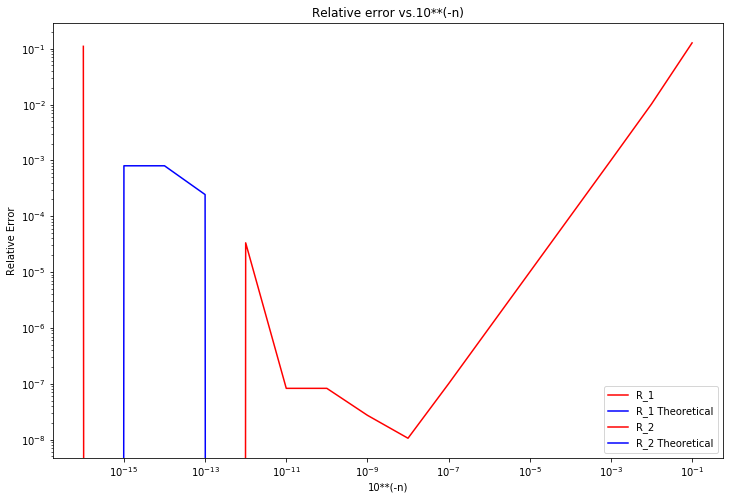

In [83]:
plt.figure(figsize=(12, 8))

plt.plot(N, relE1, 'r-', label='R_1')
plt.plot(N, relE1_t, 'b-', label='R_1 Theoretical')
plt.plot(N, relE2, 'r-', label='R_2')
plt.plot(N, relE2_t, 'b-', label='R_2 Theoretical')
plt.xlabel("10**(-n)")
plt.ylabel("Relative Error")
plt.xscale('log')
plt.yscale('log')
plt.title('Relative error vs.10**(-n)')
plt.legend()
plt.show()